In this project, we are building a predictive model to determine approximately when the customers are about to leave the organization.

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [541]:
d = pd.read_excel("D:\\projects\\customer_churn_large_dataset.xlsx")

In [542]:
d.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [543]:
d.shape

(100000, 9)

In [544]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [545]:
d.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


## data preprocessing

In [546]:
d.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [547]:
# Removing variables that will not affect the dependent variable
d = d.drop(["CustomerID","Name"], axis = 1)

In [550]:
d.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## EDA

In [551]:
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

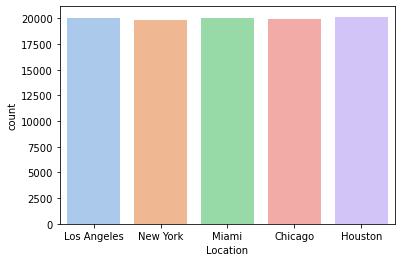

In [552]:
sns.countplot(d['Location'],palette='pastel')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

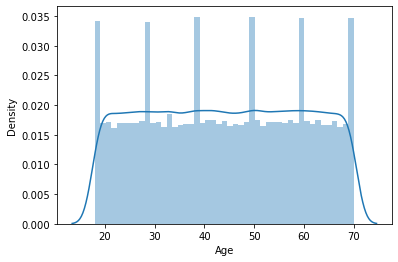

In [553]:
sns.distplot(d['Age'])

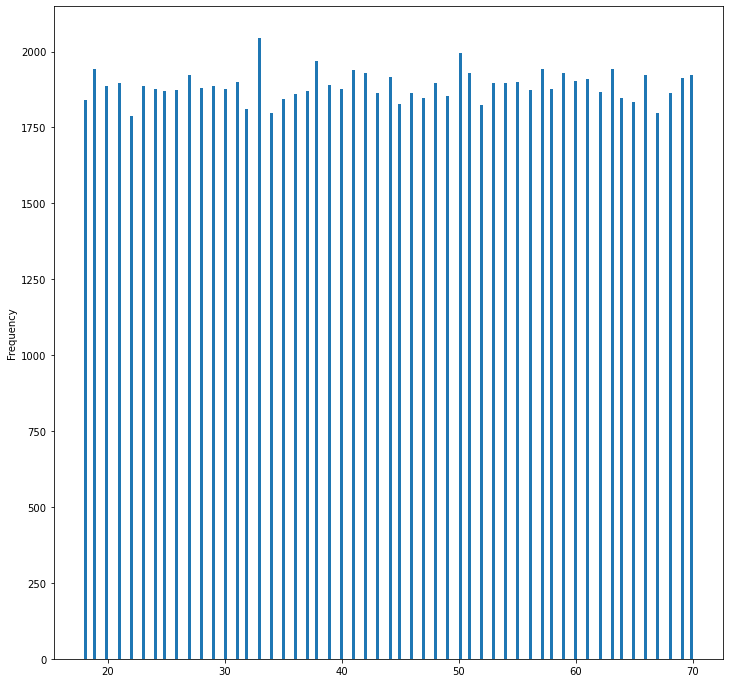

In [554]:
d.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

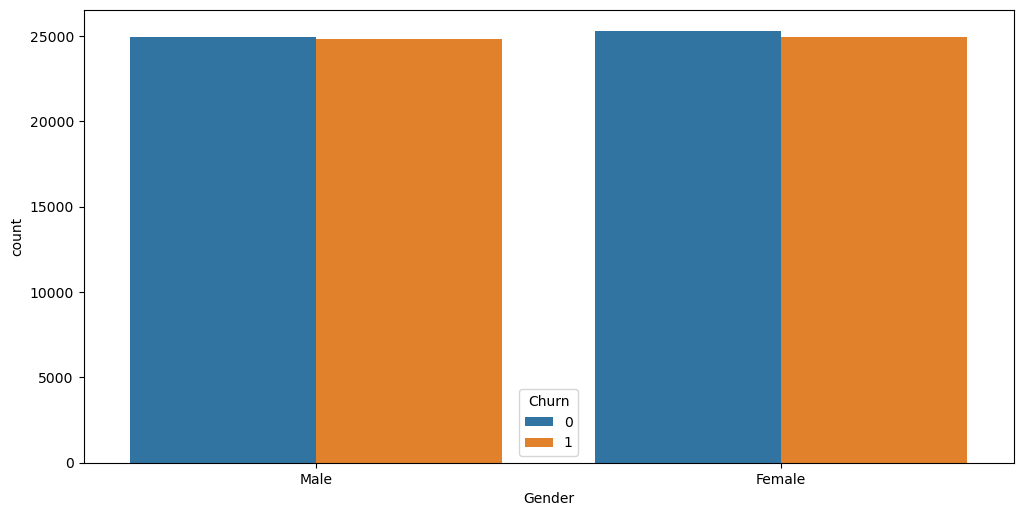

In [556]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
sns.countplot(x='Gender', hue="Churn", data=d)
ax.set_xlabel('Gender')
ax.set_ylabel('count')
plt.show()

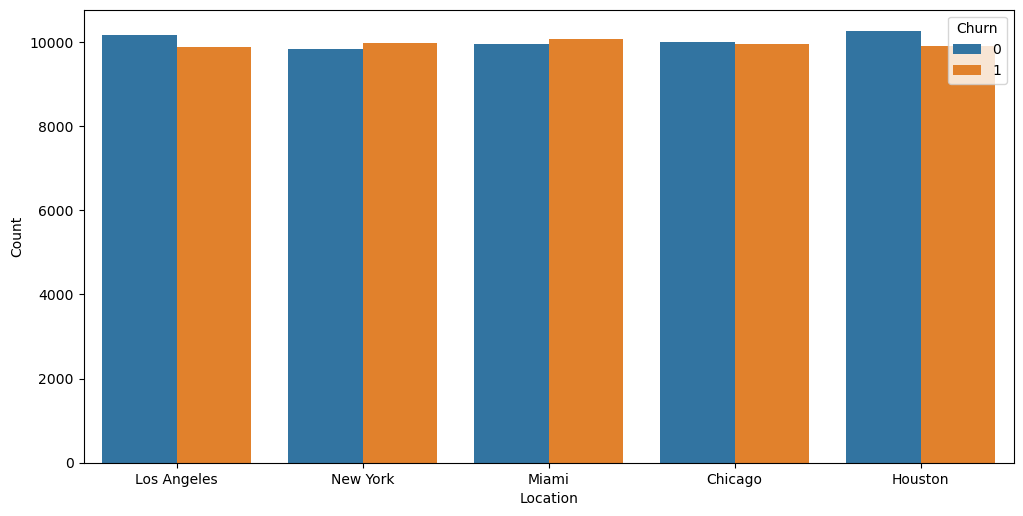

In [557]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

sns.countplot(x='Location', hue="Churn", data=d)

ax.set_xlabel('Location')
ax.set_ylabel('Count')

plt.show()


<AxesSubplot:xlabel='Location', ylabel='Churn'>

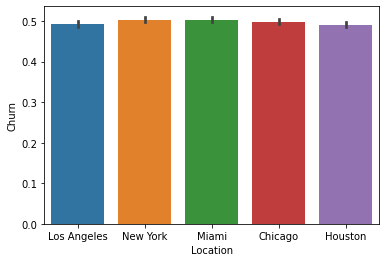

In [555]:
sns.barplot(x='Location', y='Churn', data=d)

## Feature Engineering

### label encoding

In [558]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across team, position, and all_star columns
d[['Gender']] = d[['Gender']].apply(LabelEncoder().fit_transform)

### one hot encoding 

In [559]:
d = pd.get_dummies(d,columns = ['Location'])

In [560]:
d

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,0,1
2,24,0,5,85.47,460,0,0,0,1,0,0
3,36,0,3,97.94,297,1,0,0,0,1,0
4,46,0,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,1,23,55.13,226,1,0,1,0,0,0
99996,62,0,19,61.65,351,0,0,0,0,0,1
99997,64,1,17,96.11,251,1,1,0,0,0,0
99998,51,0,20,49.25,434,1,0,0,0,0,1


### scaling the values

In [561]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
d[col] = scale.fit_transform(d[col])
d

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.241670,1,0.651115,0.410606,-0.294289,0,0,0,1,0,0
1,1.176226,0,-1.658879,-0.805374,-0.784852,0,0,0,0,0,1
2,-1.310651,0,-1.081380,1.009204,1.422681,0,0,0,1,0,0
3,-0.525321,0,-1.370129,1.625597,0.173279,1,0,0,0,1,0
4,0.129120,0,0.939864,-0.341720,-0.064338,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.721654,1,1.517363,-0.490504,-0.370939,1,0,1,0,0,0
99996,1.176226,0,0.939864,-0.168220,0.587191,0,0,0,0,0,1
99997,1.307115,1,0.651115,1.535140,-0.179313,1,1,0,0,0,0
99998,0.456341,0,1.084239,-0.781153,1.223390,1,0,0,0,0,1


### Train test split

In [562]:
# separating the data and labels
X = d.drop(columns = 'Churn', axis=1)
y = d['Churn']

In [563]:
X

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.241670,1,0.651115,0.410606,-0.294289,0,0,1,0,0
1,1.176226,0,-1.658879,-0.805374,-0.784852,0,0,0,0,1
2,-1.310651,0,-1.081380,1.009204,1.422681,0,0,1,0,0
3,-0.525321,0,-1.370129,1.625597,0.173279,0,0,0,1,0
4,0.129120,0,0.939864,-0.341720,-0.064338,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,-0.721654,1,1.517363,-0.490504,-0.370939,0,1,0,0,0
99996,1.176226,0,0.939864,-0.168220,0.587191,0,0,0,0,1
99997,1.307115,1,0.651115,1.535140,-0.179313,1,0,0,0,0
99998,0.456341,0,1.084239,-0.781153,1.223390,0,0,0,0,1


In [564]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

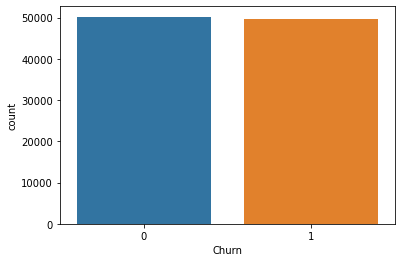

In [565]:
sns.countplot(y)

In [566]:
from sklearn.model_selection import train_test_split

In [567]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [568]:
print(X.shape, X_train.shape, X_test.shape)

(100000, 10) (80000, 10) (20000, 10)


In [569]:
print(y.shape, y_train.shape, y_test.shape)

(100000,) (80000,) (20000,)


## model building

### Logistic Regression

In [570]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [571]:
reg.fit(X_train,y_train)

LogisticRegression()

In [572]:
pred_log = reg.predict(X_test)
print(pred_log)

[0 0 0 ... 1 1 0]


In [573]:
accuracy_log = reg.score(X_test,y_test)
print(accuracy_log)

0.5032


In [574]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [575]:
print(classification_report(y_test, pred_log, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.51      0.61      0.55     10057
           1       0.50      0.40      0.44      9943

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### Decision Tree

In [576]:
from sklearn import tree
dec = tree.DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [577]:
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [578]:
pred_dec = dec.predict(X_test)
print(pred_dec)

[0 0 0 ... 0 0 0]


In [579]:
accuracy_dec = dec.score(X_test,y_test)
print(accuracy_dec)

0.5042


In [580]:
print(classification_report(y_test, pred_dec))

              precision    recall  f1-score   support

           0       0.50      0.91      0.65     10057
           1       0.51      0.10      0.16      9943

    accuracy                           0.50     20000
   macro avg       0.51      0.50      0.41     20000
weighted avg       0.51      0.50      0.41     20000



### Random Forest

In [581]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()

In [582]:
r.fit(X_train,y_train)

RandomForestClassifier()

In [583]:
from sklearn.metrics import accuracy_score
pred_ran = r.predict(X_test)
accuracy_ran = accuracy_score(pred_ran,y_test)
print(accuracy_ran)

0.50255


In [584]:
print(classification_report(y_test, pred_ran))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10057
           1       0.50      0.48      0.49      9943

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### KNN

In [585]:
from sklearn.neighbors import KNeighborsClassifier  
k = KNeighborsClassifier(n_neighbors=5 )  

In [586]:
k.fit(X_train, y_train)

KNeighborsClassifier()

In [587]:
pred_k = k.predict(X_test) 

In [588]:
accuracy_k = k.score(X_test,y_test)
print(accuracy_k)

0.501


In [589]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     10057
           1       0.50      0.50      0.50      9943

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### AdaBoost Classifier

In [590]:
from sklearn.ensemble import AdaBoostClassifier
a = AdaBoostClassifier()
a.fit(X_train,y_train)

AdaBoostClassifier()

In [591]:
pred_a = a.predict(X_test)

In [592]:
accuracy_a = metrics.accuracy_score(y_test, pred_a)
print(accuracy_a)
print(classification_report(y_test, pred_a))

0.50005
              precision    recall  f1-score   support

           0       0.50      0.60      0.55     10057
           1       0.50      0.40      0.44      9943

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.50     20000



## model evaluation

In [593]:
models = pd.DataFrame({'name_model':["KNN","Logistic Regression","Random Forest","Decision Trees","Adaboost Classifier"],\
                        'accuracy':[accuracy_k,accuracy_log,accuracy_ran,accuracy_dec,accuracy_a]})

In [594]:
models

,name_model,accuracy
0,KNN,0.50100
1,Logistic Regression,0.50320
2,Random Forest,0.50255
3,Decision Trees,0.50420
4,Adaboost Classifier,0.50005


### out of all, we get accuracy of decision tree maximum, so we will apply hyperparameter tuning here.

### Hyperparameter tuning in Decision Trees

In [595]:
dec.tree_.max_depth

6

In [659]:
from sklearn import tree
for max_d in range(1,7):
    tuned_dec = tree.DecisionTreeClassifier(random_state = 100,max_depth=max_d)
    tuned_dec.fit(X_train,y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), tuned_dec.score(X_train,y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), tuned_dec.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.503775
The Validation Accuracy for max_depth 1 is: 0.50115

The Training Accuracy for max_depth 2 is: 0.505525
The Validation Accuracy for max_depth 2 is: 0.50455

The Training Accuracy for max_depth 3 is: 0.506475
The Validation Accuracy for max_depth 3 is: 0.50425

The Training Accuracy for max_depth 4 is: 0.5086875
The Validation Accuracy for max_depth 4 is: 0.5005

The Training Accuracy for max_depth 5 is: 0.5095375
The Validation Accuracy for max_depth 5 is: 0.50235

The Training Accuracy for max_depth 6 is: 0.5101625
The Validation Accuracy for max_depth 6 is: 0.50235



In [645]:
X = d.drop(columns = 'Churn', axis=1)
y = d['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Processes data has {X_train.shape[0]} train data and {X_test.shape[0]} test data")

Processes data has 80000 train data and 20000 test data


In [646]:
#Base Model Accuracy
from sklearn import tree
dec = tree.DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dec.fit(X_train, y_train)
pred_dec = dec.predict(X_test)
print(f"Base Model Accuracy: {accuracy_score(y_test, pred_dec)}")

Base Model Accuracy: 0.50215


In [660]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dec))

              precision    recall  f1-score   support

           0       0.50      0.87      0.64     10020
           1       0.50      0.13      0.21      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.42     20000
weighted avg       0.50      0.50      0.42     20000



In [649]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

In [650]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [651]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [652]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.289637,0.026332,0.025469,0.003758,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5023,0.50205,0.4945,0.4982,0.499262,0.003194,42
1,0.339378,0.024067,0.052079,0.032738,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5023,0.50205,0.4945,0.4982,0.499262,0.003194,42
2,0.463358,0.036604,0.071348,0.038496,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5023,0.50205,0.4945,0.4982,0.499262,0.003194,42
3,0.267474,0.035636,0.018910,0.004916,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5023,0.50345,0.4945,0.4981,0.499587,0.003549,28
4,0.197189,0.005266,0.018635,0.003447,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5023,0.50345,0.4945,0.4981,0.499587,0.003549,28


In [653]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       random_state=100)

In [654]:
dec_best = grid_search.best_estimator_

In [655]:
evaluate_model(dec_best)

Train Accuracy : 0.51055
Train Confusion Matrix:
[[35339  4862]
 [34294  5505]]
--------------------------------------------------
Test Accuracy : 0.50215
Test Confusion Matrix:
[[8758 1262]
 [8695 1285]]


In [657]:
from sklearn.metrics import classification_report

In [658]:
print(classification_report(y_test, dec_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51     10020
           1       0.50      0.47      0.49      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [661]:
### Create a Pickle file using serialization 
import pickle

In [662]:
filename = "file.pkl"
pickle.dump(dec_best,open(filename,'wb'))